<a href="https://colab.research.google.com/github/dlyrikz/DeepLearning/blob/master/RNN_and_LSTM_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install and Setup

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Data Preprocessing

In [20]:
# importing libraries
from tensorflow.keras.datasets import mnist

In [21]:
# loading thr datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [22]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [24]:
x_train.min(), x_train.max()

(0, 255)

In [25]:
y_train.min(), y_train.max()

(0, 9)

In [26]:
# Normalize the dataset
x_train = x_train / 255.0
x_test = x_test /255.0

In [27]:
x_train.min(), x_train.max()

(0.0, 1.0)

4

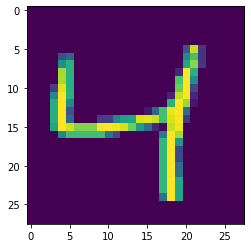

In [46]:
# check Sample image
for x in range(3):
  plt.imshow(x_train[x])
y_train[x]

In [41]:
y_train[3]

1

# Step 3: Build the LSTM

In [30]:
# define an object (initializing the RNN)
model = tf.keras.models.Sequential()


In [31]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer (first Dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [34]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model

In [36]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.4505 - accuracy: 0.8579 - val_loss: 0.2202 - val_accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1655 - accuracy: 0.9552 - val_loss: 0.0824 - val_accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1131 - accuracy: 0.9711 - val_loss: 0.0916 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0903 - accuracy: 0.9762 - val_loss: 0.0592 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0815 - accuracy: 0.9786 - val_loss: 0.0750 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0595 - accuracy: 0.9841 - val_loss: 0.0470 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0548 - accuracy: 0.9857 - val_loss: 0

In [48]:
# Predictions
y_predict = model.predict_classes(x_test)

In [49]:
print(y_predict[10], y_test[10])

0 0


In [50]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 970    0    1    0    0    1    2    1    5    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   2    0 1020    3    0    0    1    3    2    1]
 [   0    0    2 1002    0    2    0    3    0    1]
 [   0    0    0    0  947    0    6    4    0   25]
 [   0    1    1    8    0  878    2    0    1    1]
 [   2    3    0    1    3    5  942    0    2    0]
 [   0    4    5    2    1    0    0 1011    0    5]
 [   0    1    9    1    1    2    0    3  952    5]
 [   0    1    0    1    4    3    0    4    2  994]]


In [51]:
accuracy_cm = accuracy_score(y_test, y_predict)
print(accuracy_cm)

0.9848


# Step 5: Learning Curve

In [54]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'], label='Train')
  plt.plot(epoch_range, history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

  #training vs validation loss

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'], label="Train")
  plt.plot(epoch_range, history.history['val_loss'], label="Loss")
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

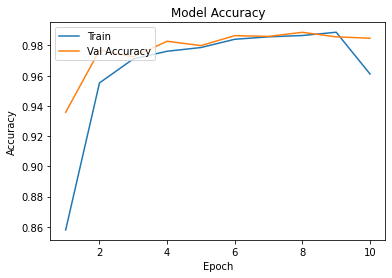

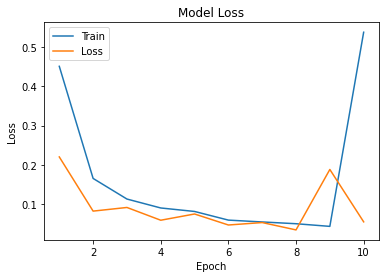

In [56]:
learning_curve(history, 10)